In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

import mlflow
import mlflow.sklearn

In [9]:
dados = pd.read_csv("Credit.csv")
dados.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [10]:
dados.shape


(1000, 21)

In [11]:
x = dados.iloc[:,0:20].values
y = dados.iloc[:,20].values
x

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [12]:
labelencoder = LabelEncoder()

In [13]:
for i in range(x.shape[1]):
    if x[:,i].dtype == "object":
        x[:,i] = labelencoder.fit_transform(x[:,i])
x
    

array([[2, 2, 1, ..., 0, 1, 1],
       [1, 29, 3, ..., 0, 0, 1],
       [0, 8, 1, ..., 1, 0, 1],
       ...,
       [0, 8, 3, ..., 0, 0, 1],
       [2, 27, 3, ..., 0, 1, 1],
       [1, 27, 1, ..., 0, 0, 1]], dtype=object)

In [14]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size = 0.3)
x_treino

array([[3, 6, 3, ..., 0, 0, 1],
       [0, 8, 1, ..., 0, 0, 1],
       [2, 13, 3, ..., 0, 0, 1],
       ...,
       [2, 13, 0, ..., 1, 0, 1],
       [1, 13, 4, ..., 0, 0, 1],
       [1, 23, 3, ..., 0, 1, 1]], dtype=object)

In [18]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(x_teste,y_teste)
modelo

GaussianNB()

In [22]:
previsoes = modelo.predict(x_teste)
previsoes

array(['good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
     

In [59]:
acuracia = accuracy_score(y_teste, previsoes)
recall = recall_score(y_teste, previsoes, average = "weighted")
f1 = f1_score(y_teste, previsoes, average = "weighted")
precisao = precision_score(y_teste, previsoes, average = "weighted")
print(f'Acuracia: {acuracia}, Recall: {recall}, f1: {f1}, Precisão: {precisao}')

Acuracia: 0.7466666666666667, Recall: 0.7466666666666667, f1: 0.7494607843137256, Precisão: 0.7533333333333333


In [62]:
classif = classification_report(y_teste, previsoes)
classif

'              precision    recall  f1-score   support\n\n         bad       0.58      0.63      0.60        92\n        good       0.83      0.80      0.81       208\n\n    accuracy                           0.75       300\n   macro avg       0.70      0.71      0.71       300\nweighted avg       0.75      0.75      0.75       300\n'

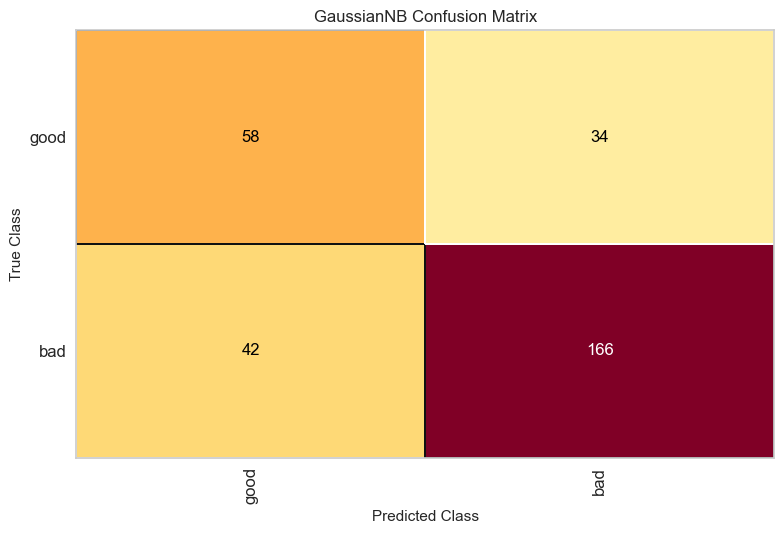

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
confusao = ConfusionMatrix(modelo, classes = ["good", "bad"])
confusao.fit(x_treino, y_treino)
confusao.score(x_teste, y_teste)
confusao.poof()

In [121]:
modelorf = RandomForestClassifier(n_estimators = 100)
modelorf.fit(x_treino,y_treino)
previsoesrf = modelorf.predict(x_teste)

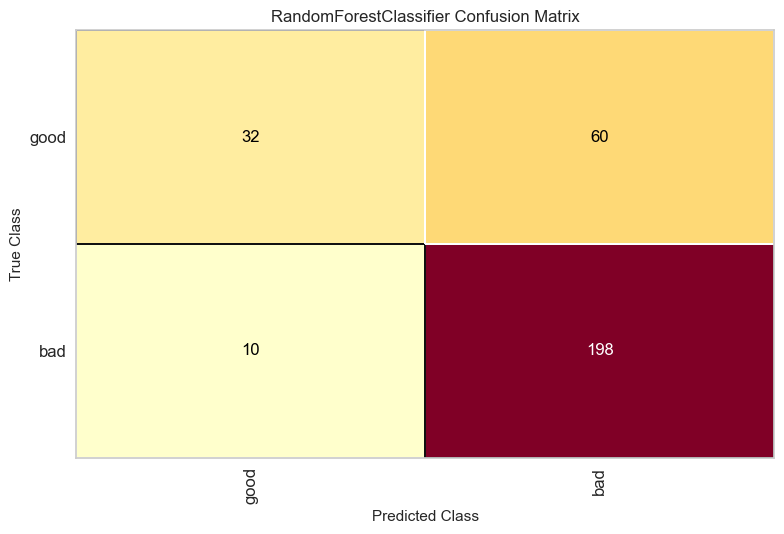

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [123]:
confusaorf = ConfusionMatrix(modelorf, classes = ["good", "bad"])
confusaorf.fit(x_treino, y_treino)
confusaorf.score(x_teste, y_teste)
confusaorf.poof()

In [125]:
accuracy_score(y_teste, previsoesrf)

0.7666666666666667

In [95]:
accuracy_score(y_teste, previsoes)

0.7466666666666667

In [246]:
def ModeloRF (estimators):
    mlflow.set_experiment("ModeloRF")
    with mlflow.start_run():
        rf = RandomForestClassifier(n_estimators = estimators)
        rf.fit(x_treino,y_treino)
        rfprevisoes = rf.predict(x_teste)
        
        
        mlflow.log_param('n_estimators', estimators )
        
        
        acuracia = accuracy_score(y_teste, rfprevisoes)
        f1 = f1_score(y_teste,rfprevisoes, average = 'weighted')
        recall = recall_score(y_teste, rfprevisoes, average = 'weighted')
        
        
        mlflow.log_metric("Acurácia", acuracia) 
        mlflow.log_metric("F1", f1)
        mlflow.log_metric('Recall', recall)
              
                
    
        
        
        mlflow.sklearn.log_model(rf, "ModeloRF")
        
        print("Modelo: ", mlflow.active_run().info.run_uuid)
        
    mlflow.end_run()

In [248]:
arvores = [50,75,100,150,200,300,400]
for x in arvores:
    ModeloRF(x)

2024/08/03 17:54:59 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo:  c74a83bc5092419ea48f6a77bb4ad05b


2024/08/03 17:55:02 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo:  e63cdb50f5f04005946d8b2eb7c9e475


2024/08/03 17:55:05 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo:  5232e2d773a642dfa69b5c7f9665940c


2024/08/03 17:55:09 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo:  287fb0f2311e40488aec55842cb3ab41


2024/08/03 17:55:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo:  c7a4f726088d43f3a533a93e04060385


2024/08/03 17:55:17 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo:  731ca1d89a584d809951b64b04bb5d6e


2024/08/03 17:55:22 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo:  0d7255f3a6cf44b286dec228e59a6a3b
